# Netflix Content Strategy Analysis with Python

Now, let’s get started with the task of Netflix Content Strategy Analysis by importing the necessary Python libraries and the dataset:

Remeber to run the cells that are coded already. You need to write or fill codes where you are supposed to . For some cells you are given the sample output. Dont run those cells or otherwise you will loose the hints.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Load the Netflix dataset
# a. Download the dataset file from the provided link and place it in the working directory.
# b. Load the dataset into a pandas DataFrame named `netflix_data`.
file_path = "netflix_content_2023.csv" 
netflix_data = pd.read_csv(file_path)


Let's start with cleaning and preprocessing the “Hours Viewed” column to prepare it for analysis:

In [7]:
# 3. Clean and preprocess the dataset
# a. Clean the 'Hours Viewed' column by removing commas and converting it to a numeric format.
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].astype(str).str.replace(',', '').astype(float)
print (netflix_data[['Title', 'Hours Viewed']])


                                              Title  Hours Viewed
0                         The Night Agent: Season 1   812100000.0
1                         Ginny & Georgia: Season 2   665100000.0
2                The Glory: Season 1 // 더 글로리: 시즌 1   622800000.0
3                               Wednesday: Season 1   507700000.0
4               Queen Charlotte: A Bridgerton Story   503000000.0
...                                             ...           ...
24807            We Are Black and British: Season 1      100000.0
24808             Whitney Cummings: Can I Touch It?      100000.0
24809                       Whitney Cummings: Jokes      100000.0
24810  Whose Vote Counts, Explained: Limited Series      100000.0
24811   Zach Galifianakis: Live at the Purple Onion      100000.0

[24812 rows x 2 columns]


In [ ]:
# 3. Clean and preprocess the dataset
# a. Clean the 'Hours Viewed' column by removing commas and converting it to a numeric format.




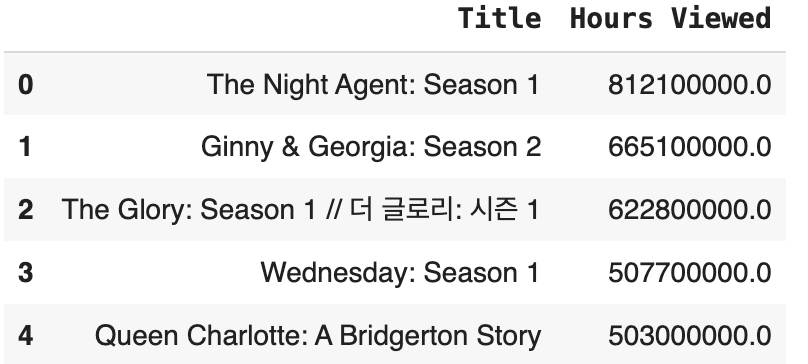

The “Hours Viewed” column has been successfully cleaned and converted to a numeric format. Now, analyze trends in content type to determine whether shows or movies dominate viewership. Let’s visualize the distribution of total viewership hours between Shows and Movies:

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64


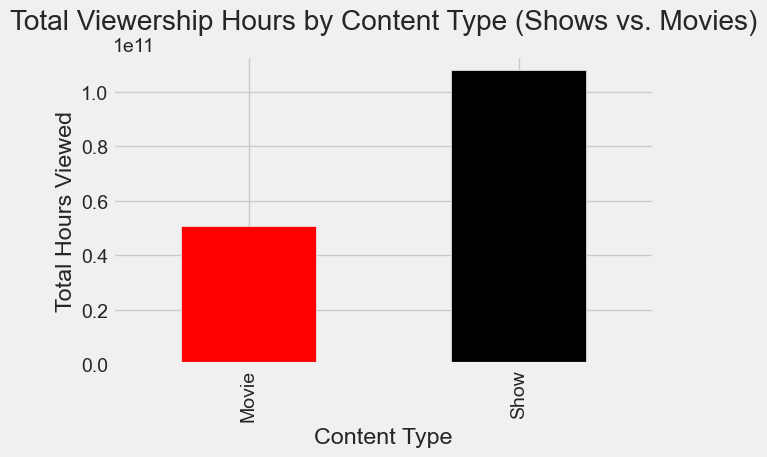

In [9]:
# Analyze trends in content type
# a. Group the data by content type (e.g., Movies vs. Shows).
# b. Calculate the total viewership hours for each type.
# c. Create a bar chart to visualize the distribution.
grouped_data = netflix_data.groupby('Content Type')
content_type_viewership = grouped_data['Hours Viewed'].sum()
print(content_type_viewership)
content_type_viewership.plot(kind='bar', color=['red', 'black'])
plt.title('Total Viewership Hours by Content Type (Shows vs. Movies)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed')
plt.tight_layout() 
plt.show()


In [ ]:
# Analyze trends in content type
# a. Group the data by content type (e.g., Movies vs. Shows).
# b. Calculate the total viewership hours for each type.
# c. Create a bar chart to visualize the distribution.



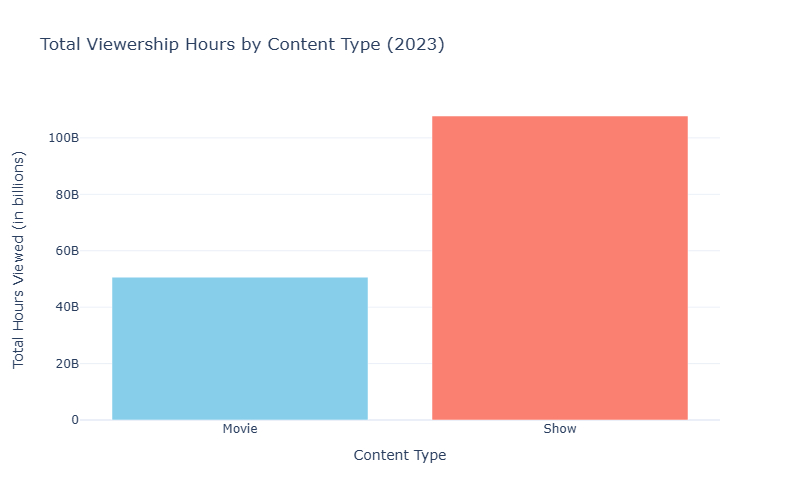

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

Next, let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption:

Language Indicator
English        1.244417e+11
Korean         1.537840e+10
Non-English    1.043910e+10
Japanese       7.102000e+09
Hindi          9.261000e+08
Russian        1.146000e+08
Name: Hours Viewed, dtype: float64


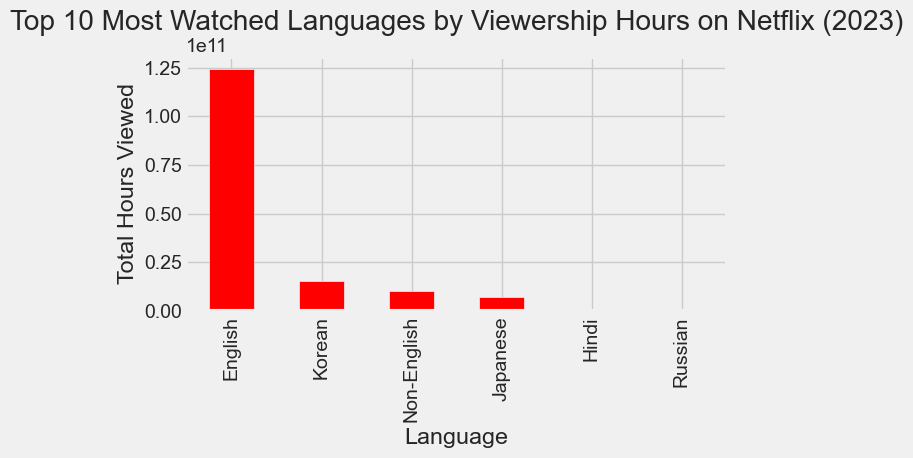

In [10]:
# Identify the top 10 most-watched titles
# a. Sort the dataset by 'Hours Viewed' in descending order.
# b. Create a bar chart to display these language and their viewership hours.

# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
top_10_languages = language_viewership.head(10)
print(top_10_languages)
top_10_languages.plot(kind='bar', color='red')

plt.title('Top 10 Most Watched Languages by Viewership Hours on Netflix (2023)')
plt.xlabel('Language')
plt.ylabel('Total Hours Viewed')

plt.tight_layout() 
plt.show()

In [ ]:
# Identify the top 10 most-watched titles
# a. Sort the dataset by 'Hours Viewed' in descending order.
# b. Create a bar chart to display these language and their viewership hours.

# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)



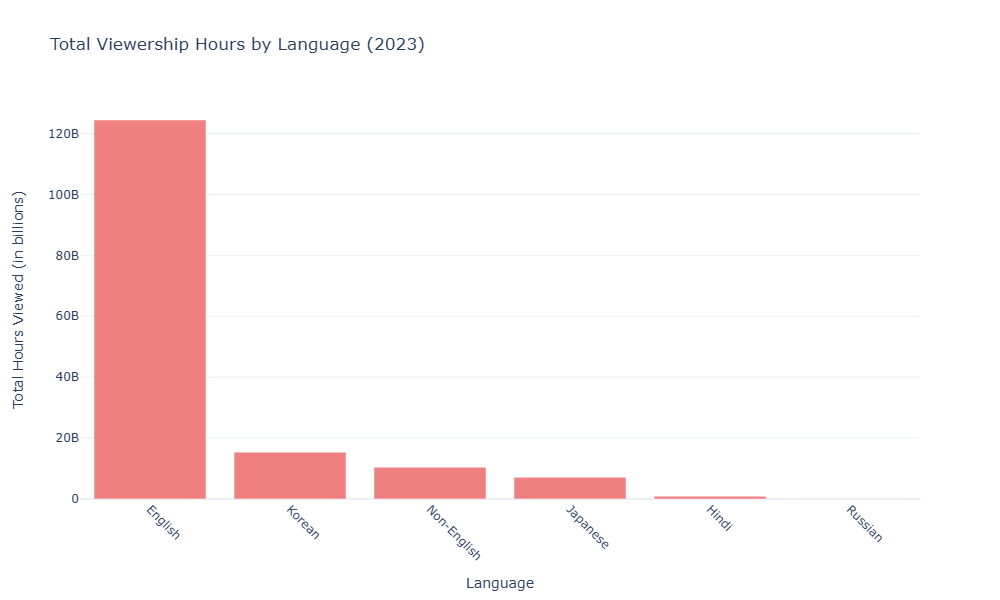

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

Next, I’ll analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months:

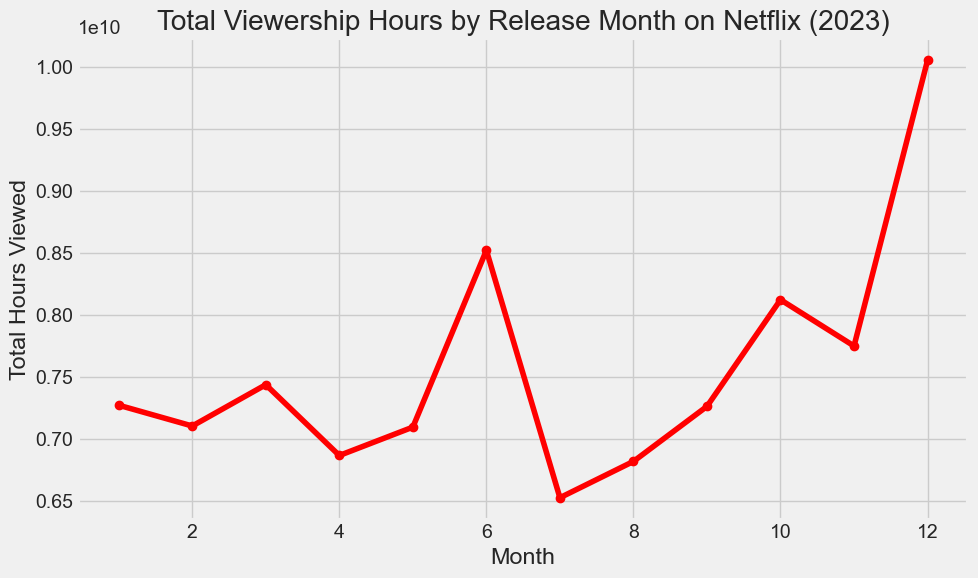

In [13]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'], errors='coerce')
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()
plt.figure(figsize=(10, 6))
monthly_viewership.plot(kind='line', marker='o', color='red')

plt.title('Total Viewership Hours by Release Month on Netflix (2023)')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed')
plt.tight_layout() 
plt.show()

In [ ]:
# convert the "Release Date" to a datetime format and extract the month
netflix_data['Release Date'] = #write your code here 
netflix_data['Release Month'] = #write your code here

# aggregate viewership hours by release month
monthly_viewership = #write your code here 

# Create the line plot
# Display the plot

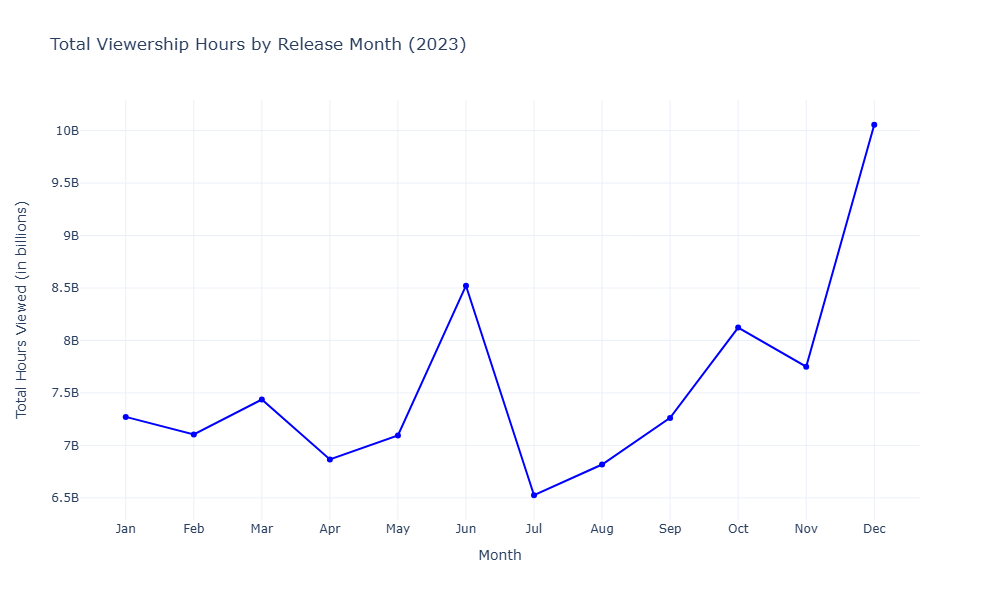

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

To delve deeper, we can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership:

In [14]:
# extract the top 5 titles based on viewership hours
top_5_titles =  netflix_data.sort_values(by='Hours Viewed', ascending=False).head(5)
top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


In [ ]:
# extract the top 5 titles based on viewership hours
top_5_titles = # your code here 
top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

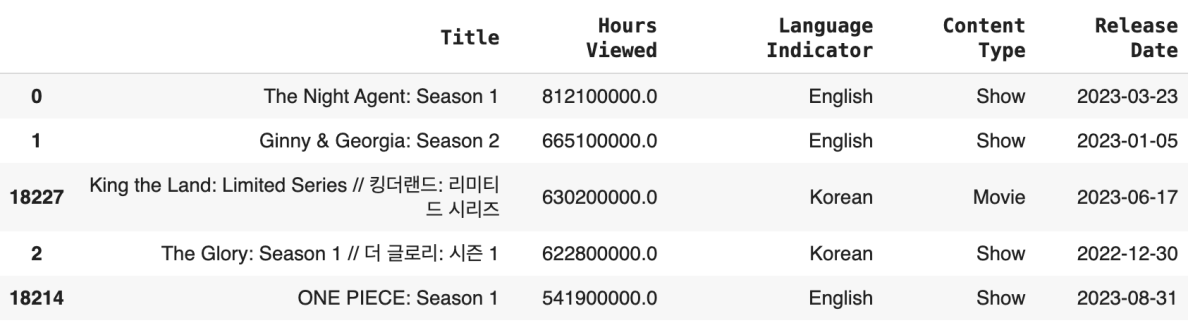

The top 5 most-viewed titles on Netflix in 2023 are:

The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.

Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.

King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.

The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.

ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

# Now, let’s have a look at the viewership trends by content type:

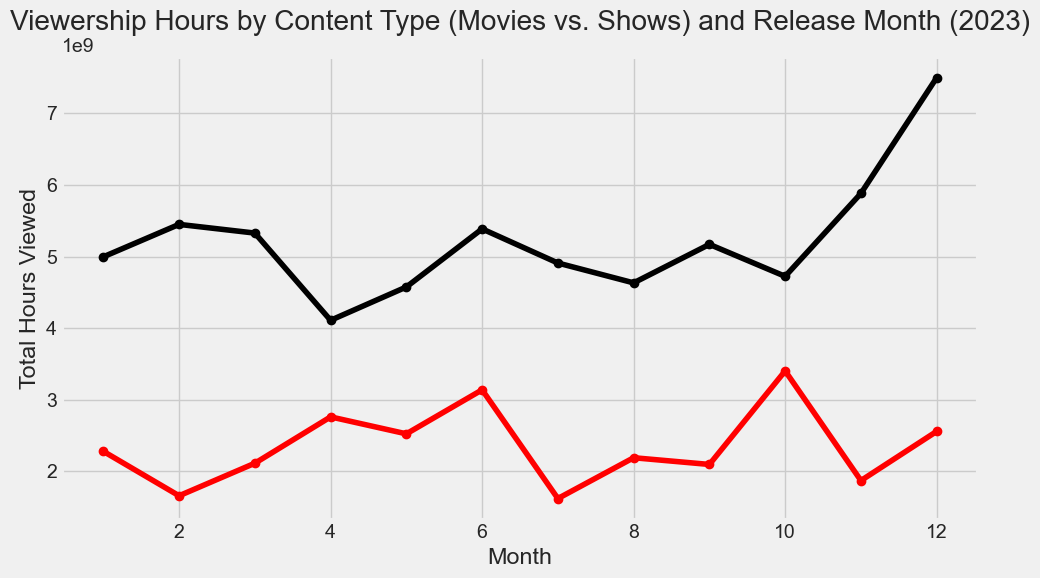

In [15]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.groupby(['Content Type', 'Release Month'])['Hours Viewed'].sum().unstack()
plt.figure(figsize=(10, 6))
monthly_viewership_by_type.loc['Movie'].plot(kind='line', marker='o', color='red', label='Movies')
monthly_viewership_by_type.loc['Show'].plot(kind='line', marker='o', color='black', label='Shows')

plt.title('Viewership Hours by Content Type (Movies vs. Shows) and Release Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed')
plt.tight_layout() 
plt.show()


In [ ]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = #your code here 

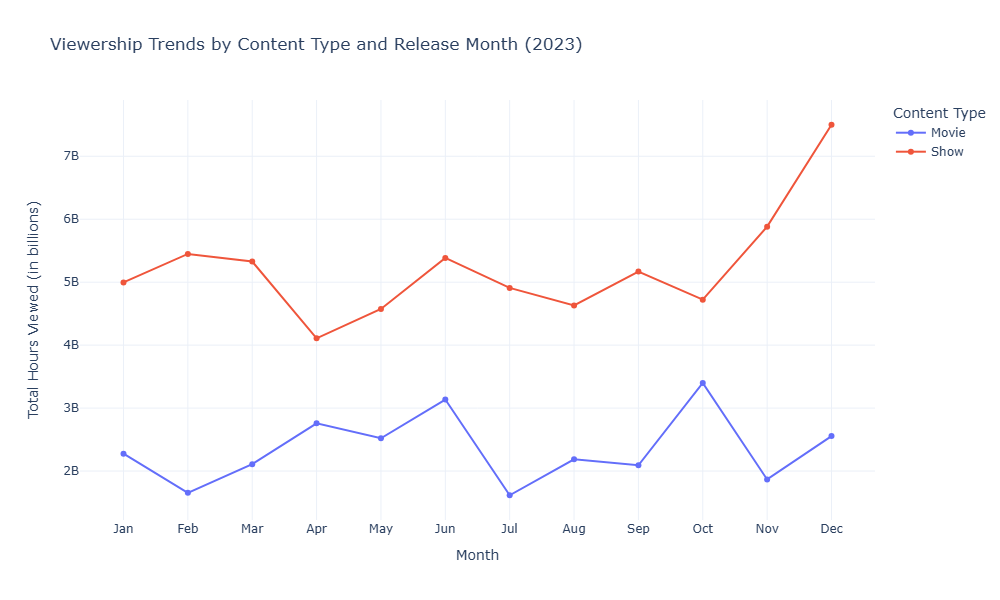

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

Now, let’s explore the total viewership hours distributed across different release seasons:

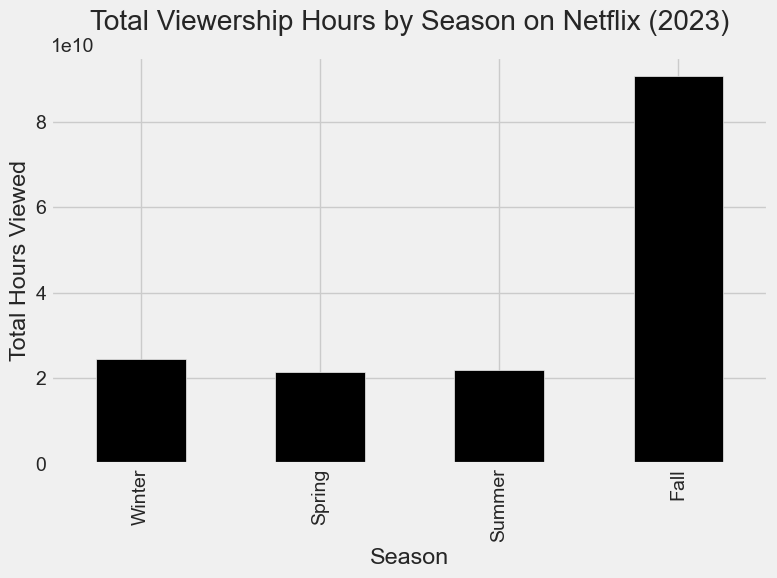

In [25]:
# Analyze seasonal viewership trends
# a. Define seasons based on release months.
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# b. Apply the season categorization to the dataset.
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# c. Aggregate viewership hours by release season.
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# d. Order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'.
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

# e. Create a bar chart for seasonal trends.
# your code here 
plt.figure(figsize=(8, 6))
seasonal_viewership.plot(kind='bar', color='black')

plt.title('Total Viewership Hours by Season on Netflix (2023)')
plt.xlabel('Season')
plt.ylabel('Total Hours Viewed')

plt.tight_layout() 
plt.show()

In [ ]:
# Analyze seasonal viewership trends
# a. Define seasons based on release months.
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# b. Apply the season categorization to the dataset.
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# c. Aggregate viewership hours by release season.
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# d. Order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'.
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

# e. Create a bar chart for seasonal trends.
# your code here 

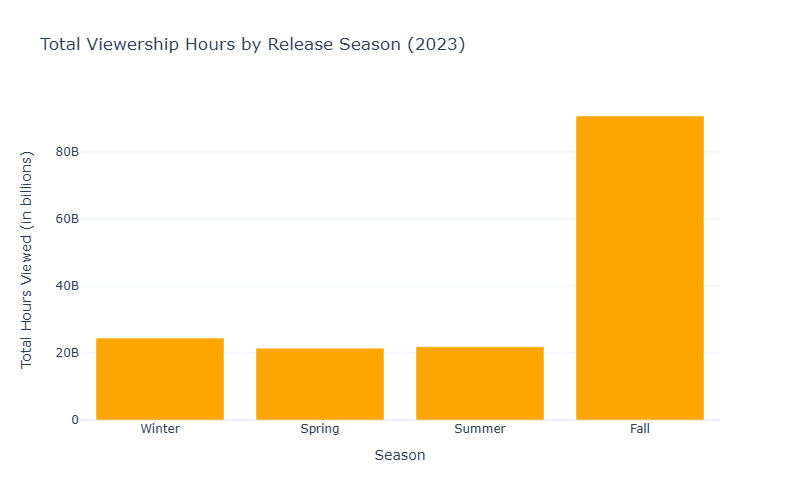

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

Now, let’s analyze the number of content releases and their viewership hours across months:

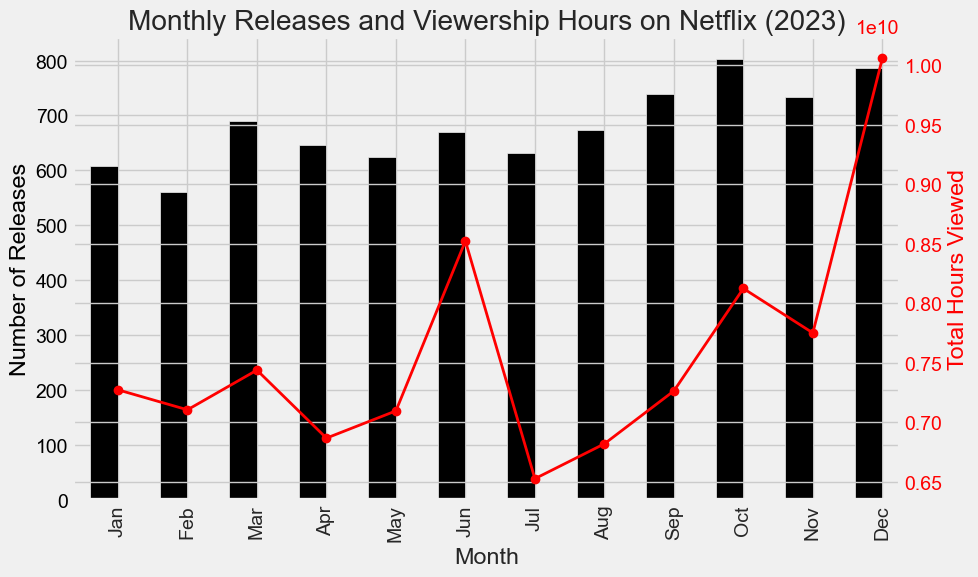

In [24]:
# Analyze monthly release patterns and viewership
# a. Calculate the number of releases for each month.
monthly_releases = netflix_data.groupby('Release Month')['Title'].count() 

# b. Aggregate total viewership hours for each month.
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

# c. Create a combined bar and line chart for monthly trends.
# your code here 
fig, ax1 = plt.subplots(figsize=(10, 6))

monthly_releases.plot(kind='bar', ax=ax1, color='black', width=0.4, position=1, label='Number of Releases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(monthly_viewership.index - 1, monthly_viewership.values, marker='o', color='red', label='Total Viewership Hours', linewidth=2)

ax2.set_xticks(range(12))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2.set_ylabel('Total Hours Viewed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Releases and Viewership Hours on Netflix (2023)')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze monthly release patterns and viewership
# a. Calculate the number of releases for each month.
monthly_releases = #your code here 

# b. Aggregate total viewership hours for each month.
monthly_viewership = #your code here 

# c. Create a combined bar and line chart for monthly trends.
# your code here 

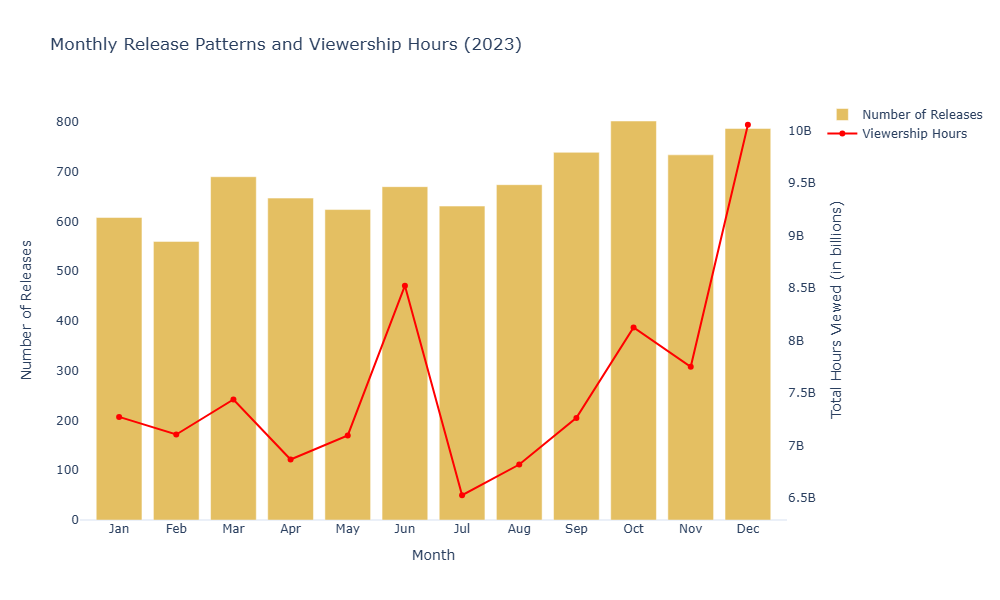

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:

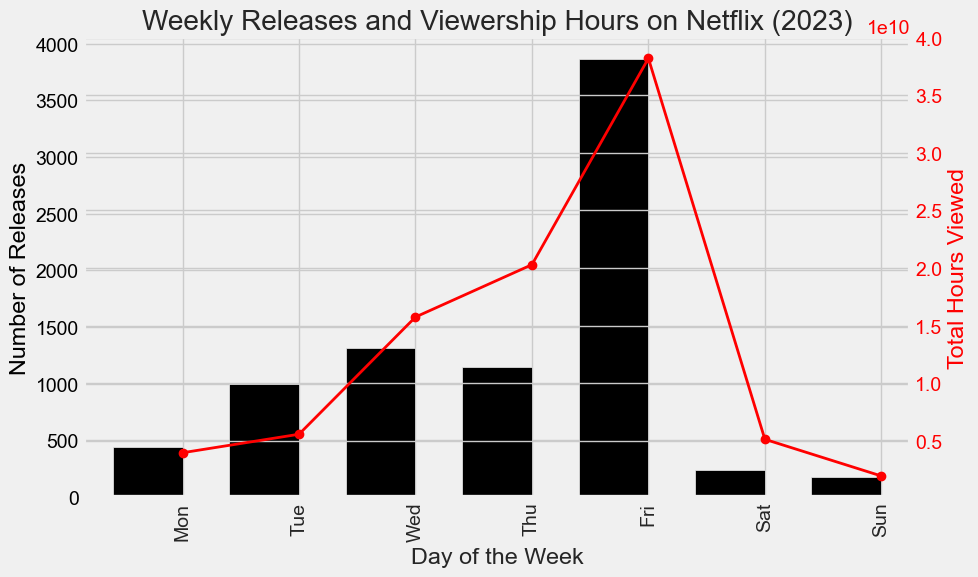

In [27]:
# Analyze weekly release patterns and viewership
# a. Extract the day of the week from the release date.
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

# b. Calculate the number of releases for each day of the week.
weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# c. Aggregate total viewership hours by day of the week.
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# d. Create a combined bar and line chart for weekly trends.
fig, ax1 = plt.subplots(figsize=(10, 6))

weekday_releases.plot(kind='bar', ax=ax1, color='black', width=0.6, position=1, label='Number of Releases')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Releases', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
weekday_viewership.plot(kind='line', ax=ax2, marker='o', color='red', label='Total Viewership Hours', linewidth=2)

ax2.set_xticks(range(7))
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax2.set_ylabel('Total Hours Viewed', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Weekly Releases and Viewership Hours on Netflix (2023)')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze weekly release patterns and viewership
# a. Extract the day of the week from the release date.
netflix_data['Release Day'] = #your code here

# b. Calculate the number of releases for each day of the week.
weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# c. Aggregate total viewership hours by day of the week.
weekday_viewership = #your code here 

# d. Create a combined bar and line chart for weekly trends.

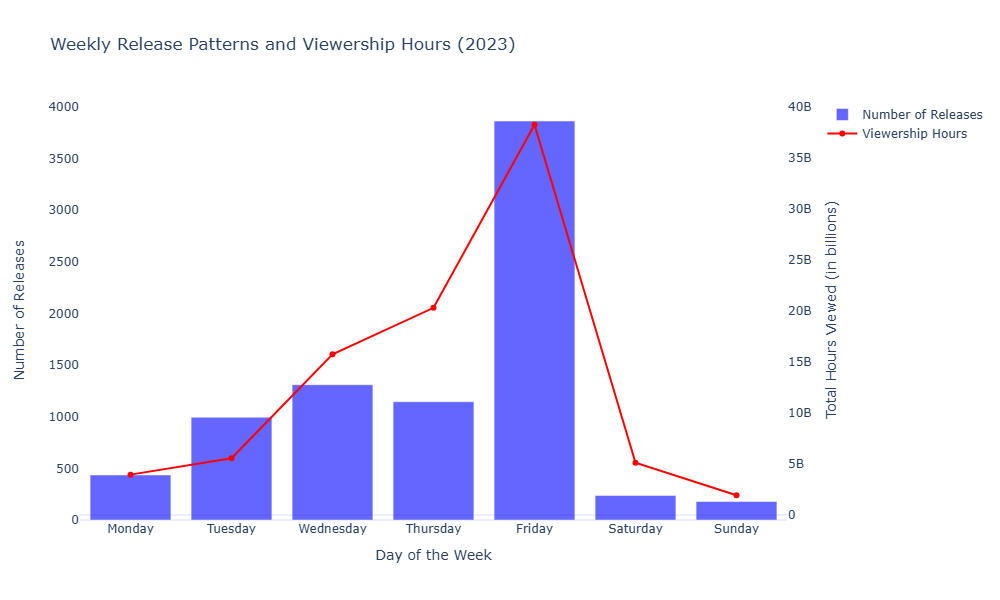

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases:

In [28]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


In [ ]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership. Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.

# Conclusion
So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.